# Cricket world cup 2023 prediction

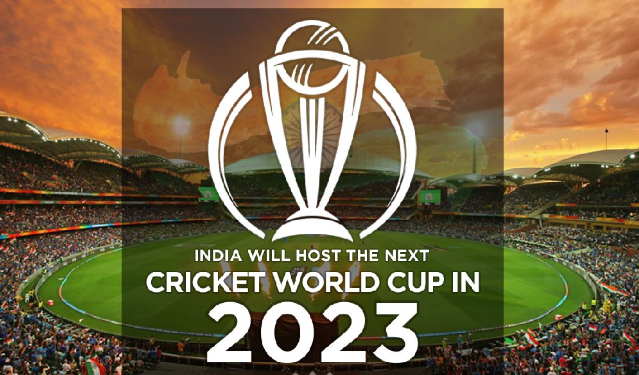

#About the dataset

## Feature Description:

DATASET 1:
1. **S.N:** Serial number
2. **Team 1:** Playing team 1
3. **Team 2:** Playing team 2
4. **Winner:** Winner of that match
5. **Margin:** Margin by win team won
6. **Ground:** Venue of the match
7. **Match Date:**: Date at which match took place
8. **Scorecard**: Odi number

DATASET 2:
1. **Position:** Position of team in current icc ranking
2. **Team:** Name of Team
3. **Points:** Overall performance points of team


## Datasets

In [36]:
import pandas as pd
import numpy as np
import sklearn
from bs4 import BeautifulSoup


Fetching data via API from espn official website

In [93]:
url = 'https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;filter=advanced;orderby=start;page=5;size=200;spanmin2=01+Jan+2015;spanval2=span;team=1;team=15;team=2;team=25;team=3;team=40;team=5;team=6;team=7;team=8;template=results;type=aggregate;view=results'

Importing other relevant dataset to current context

In [94]:
path1 = "/content/drive/MyDrive/results.csv"
path2 = "/content/drive/MyDrive/icc_rankings.csv"

In [95]:
df = pd.read_csv(path1)

In [96]:
df.head()

,S.N,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,0,New Zealand,Sri Lanka,New Zealand,45 runs,Mount Maunganui,2019-01-03,ODI # 4074
1,1,New Zealand,Sri Lanka,New Zealand,21 runs,Mount Maunganui,2019-01-04,ODI # 4075
2,2,New Zealand,Sri Lanka,New Zealand,115 runs,Nelson,2019-01-05,ODI # 4076
3,3,Australia,India,Australia,34 runs,Sydney,2019-01-06,ODI # 4077
4,4,Australia,India,India,6 wickets,Adelaide,2019-01-07,ODI # 4078


In [97]:
df1 = pd.read_csv(path2)

In [98]:
df1.head(10)

,Position,Team,Points
0,1,India,119
1,2,Australia,112
2,3,Pakistan,110
3,4,South Africa,109
4,5,New Zealand,105
5,6,England,99
6,7,Sri Lanka,92
7,8,Bangladesh,89
8,9,Afghanistan,83
9,10,Netherlands,39


Above is the current ICC ranking of the teams partipated in world cup 2023

We do not require data of teams not participating in world cup 2023

#Data Visualisation

### Countplot for winners

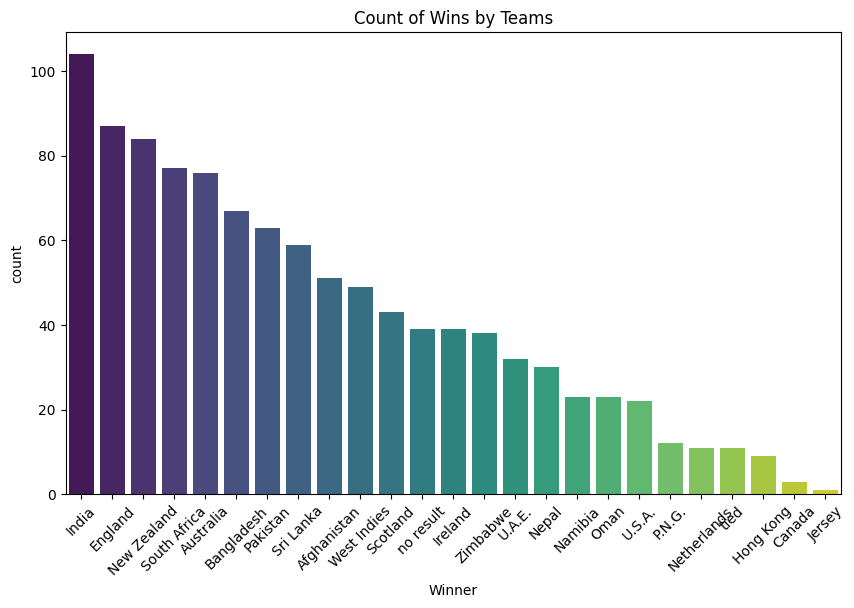

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is a pandas DataFrame named 'df'
plt.figure(figsize=(10, 6))
sns.countplot(x='Winner', data=df, order=df['Winner'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Count of Wins by Teams')
plt.show()

### Bar plot for Margin by runs

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


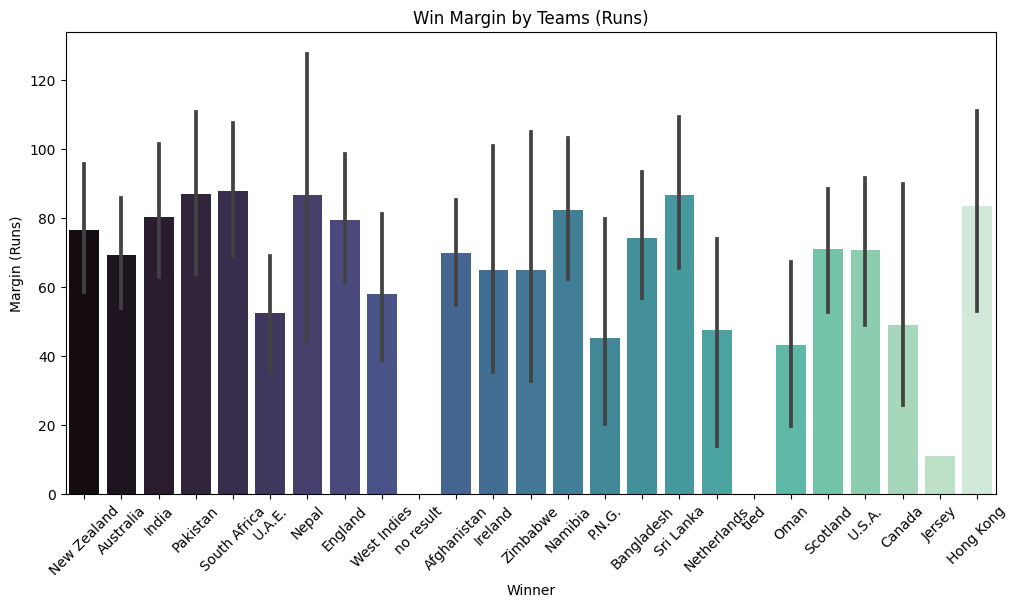

In [100]:
df['Margin (Runs)'] = df[df['Margin'].str.contains('runs')]['Margin'].str.replace(' runs', '').astype(int)

plt.figure(figsize=(12, 6))
sns.barplot(x='Winner', y='Margin (Runs)', data=df, palette='mako')
plt.xticks(rotation=45)
plt.title('Win Margin by Teams (Runs)')
plt.show()

### Bar plot for Margin by wickets

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encounte

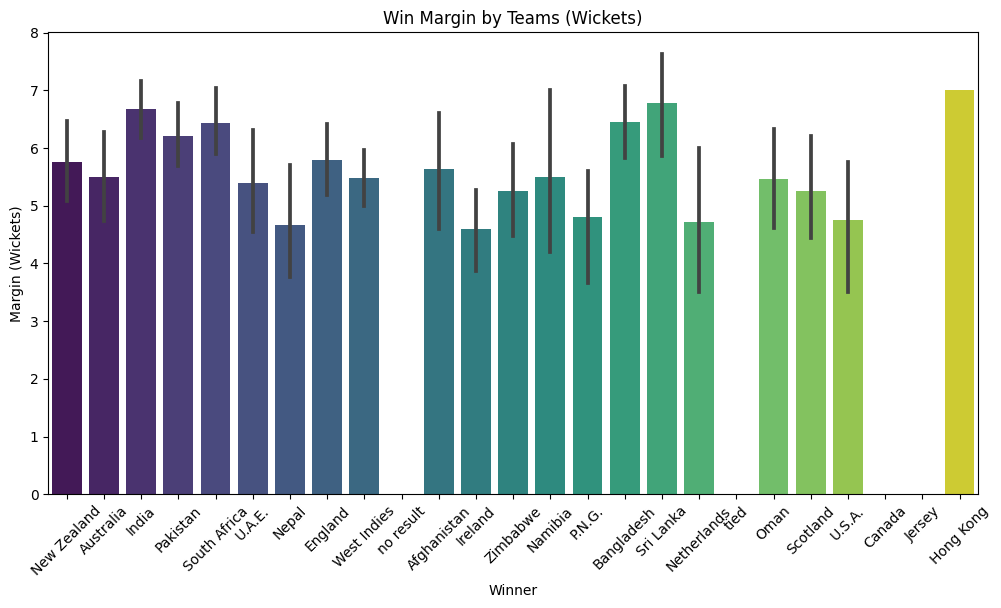

In [101]:
df['Margin (Wickets)'] = df[df['Margin'].str.contains('wickets')]['Margin'].str.replace(' wickets', '').astype(int)

plt.figure(figsize=(12, 6))
sns.barplot(x='Winner', y='Margin (Wickets)', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Win Margin by Teams (Wickets)')
plt.show()

### Time series: Wins Over Time

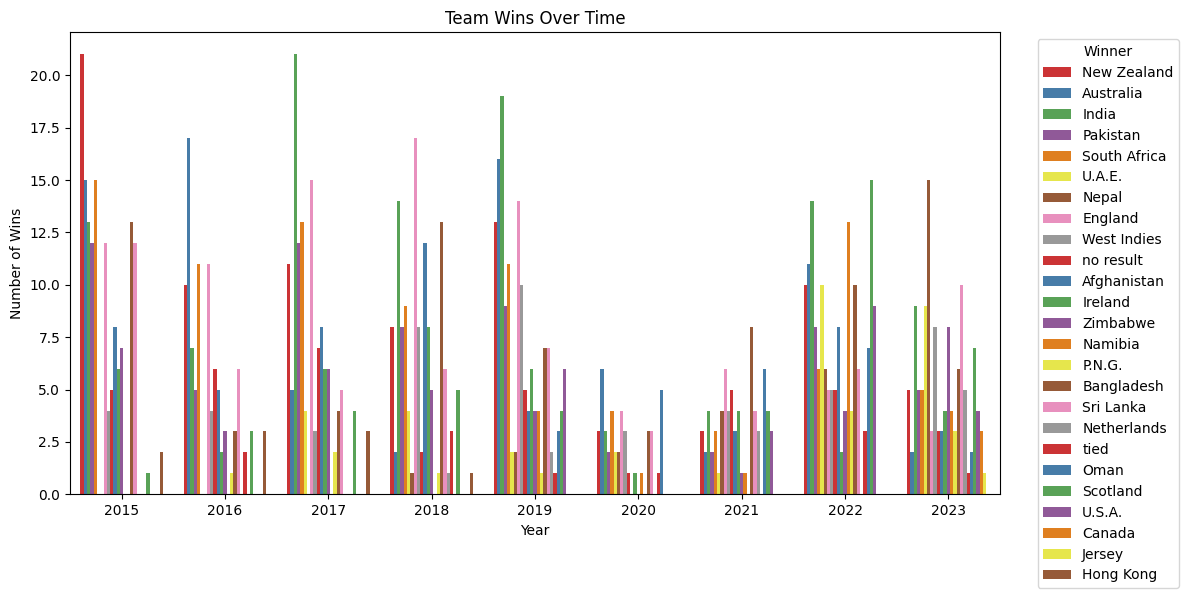

In [105]:
df['Match Date'] = pd.to_datetime(df['Match Date'])
df['Year'] = df['Match Date'].dt.year

plt.figure(figsize=(12, 6))
sns.countplot(x=df['Year'], hue=df['Winner'], palette='Set1')
plt.title('Team Wins Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.legend(title='Winner', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

### Pie Chart for Win Percentage

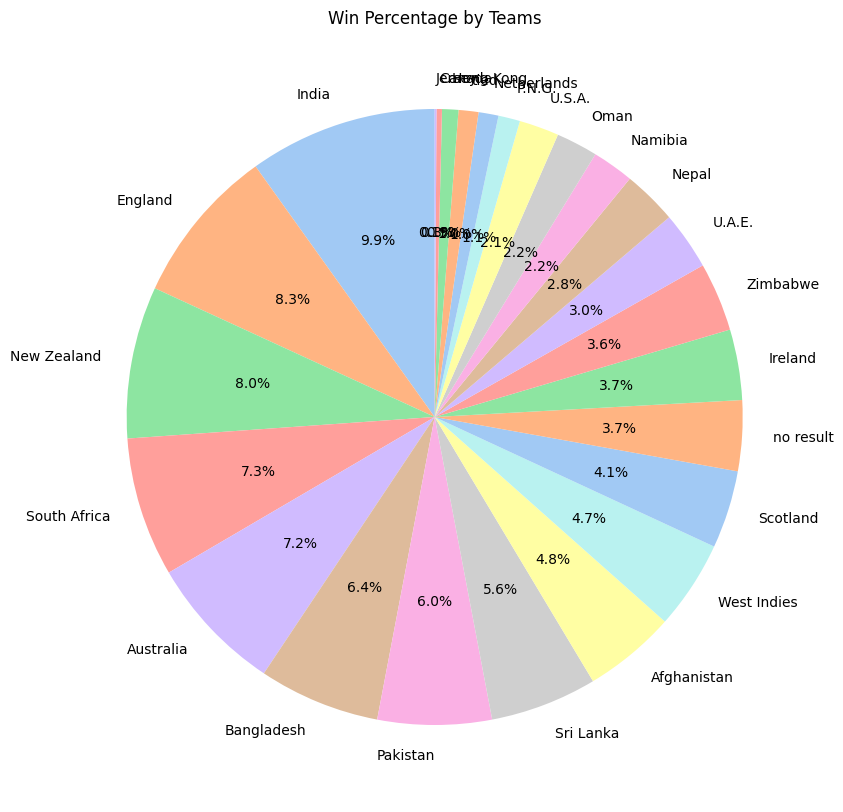

In [104]:
team_wins = df['Winner'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(team_wins, labels=team_wins.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Win Percentage by Teams')
plt.show()


## Data Preprocessing

In [43]:
teams = ['India', 'Bangladesh', '', 'Netherlands',
            'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan',
            'Australia', 'South Africa', 'England']

In [44]:
df = df[df['Team 1'].apply(lambda x: x in teams)]
df = df[df['Team 2'].apply(lambda x: x in teams)]

In [45]:
teamlist = df['Team 1'].unique()

In [46]:
(teamlist)

array(['New Zealand', 'Australia', 'South Africa', 'India', 'England',
       'Afghanistan', 'Bangladesh', 'Pakistan', 'Sri Lanka',
       'Netherlands'], dtype=object)

In [47]:
df.shape

(473, 8)

We can see only the teams participating in world cup remains in the result data

We will sort the dataset by match date from most recent to oldest

In [48]:
df = df.sort_values(by='Match Date', ascending=False)

In [49]:
df.head(10)

,S.N,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
547,547,Bangladesh,Afghanistan,Bangladesh,7 wickets,Chattogram,2023-07-11,ODI # 4621
546,546,Netherlands,Sri Lanka,Sri Lanka,128 runs,Harare,2023-07-09,ODI # 4620
545,545,Bangladesh,Afghanistan,Afghanistan,142 runs,Chattogram,2023-07-08,ODI # 4619
541,541,Bangladesh,Afghanistan,Afghanistan,17 runs,Chattogram,2023-07-05,ODI # 4615
532,532,Netherlands,Sri Lanka,Sri Lanka,21 runs,Bulawayo,2023-06-30,ODI # 4606
509,509,Sri Lanka,Afghanistan,Sri Lanka,9 wickets,Hambantota,2023-06-07,ODI # 4583
506,506,Sri Lanka,Afghanistan,Sri Lanka,132 runs,Hambantota,2023-06-04,ODI # 4580
505,505,Sri Lanka,Afghanistan,Afghanistan,6 wickets,Hambantota,2023-06-02,ODI # 4579
501,501,Pakistan,New Zealand,New Zealand,47 runs,Karachi,2023-05-07,ODI # 4575
500,500,Pakistan,New Zealand,Pakistan,102 runs,Karachi,2023-05-05,ODI # 4574


In [50]:
df.shape

(473, 8)

In [51]:
df = df.drop(columns = ["S.N" , "Margin" , "Match Date" , "Scorecard"])

In [52]:
df.head(5)

,Team 1,Team 2,Winner,Ground
547,Bangladesh,Afghanistan,Bangladesh,Chattogram
546,Netherlands,Sri Lanka,Sri Lanka,Harare
545,Bangladesh,Afghanistan,Afghanistan,Chattogram
541,Bangladesh,Afghanistan,Afghanistan,Chattogram
532,Netherlands,Sri Lanka,Sri Lanka,Bulawayo


In [53]:
a = df['Ground'].values.tolist()
b = set()
for b1 in a:
  b.add(b1)

In [54]:
len(b)

80

We also need to drop Ground since all the matches are going to play in India and training data on the grounds in which none of the match is going to be played might confuse the model.

In [55]:
df = df.drop(['Ground'] , axis = 1  )

In [56]:
df.reset_index

<bound method DataFrame.reset_index of           Team 1       Team 2       Winner
547   Bangladesh  Afghanistan   Bangladesh
546  Netherlands    Sri Lanka    Sri Lanka
545   Bangladesh  Afghanistan  Afghanistan
541   Bangladesh  Afghanistan  Afghanistan
532  Netherlands    Sri Lanka    Sri Lanka
..           ...          ...          ...
818    Australia        India    Australia
816  New Zealand    Sri Lanka    no result
814    Australia      England    Australia
813  New Zealand    Sri Lanka    Sri Lanka
810  New Zealand    Sri Lanka  New Zealand

[473 rows x 3 columns]>

In [57]:
df.head()

,Team 1,Team 2,Winner
547,Bangladesh,Afghanistan,Bangladesh
546,Netherlands,Sri Lanka,Sri Lanka
545,Bangladesh,Afghanistan,Afghanistan
541,Bangladesh,Afghanistan,Afghanistan
532,Netherlands,Sri Lanka,Sri Lanka


### Concating 2023 world cup's matches


In [58]:
this_cup = "/content/drive/MyDrive/matches.csv"
df2 = pd.read_csv(this_cup)

In [59]:
df2.head()
df2.drop(['Unnamed: 3'] , axis = 1 , inplace = True)

In [60]:
df = pd.concat([df , df2])

In [61]:
df.shape

(505, 3)

In [62]:
df1 = df1.drop(columns = ['Points'])

In [63]:
df1 = df1[['Team' , 'Position']]

In [64]:
df1.head()

,Team,Position
0,India,1
1,Australia,2
2,Pakistan,3
3,South Africa,4
4,New Zealand,5


### Adding Team position by merging both dataframe using join on team 1

In [65]:
df = df.merge(df1, left_on='Team 1', right_on='Team', how='left')

In [66]:
df.rename(columns={'Position': 'Team 1 Position'}, inplace=True)

In [67]:
df.head()

,Team 1,Team 2,Winner,Team,Team 1 Position
0,Bangladesh,Afghanistan,Bangladesh,Bangladesh,8
1,Netherlands,Sri Lanka,Sri Lanka,Netherlands,10
2,Bangladesh,Afghanistan,Afghanistan,Bangladesh,8
3,Bangladesh,Afghanistan,Afghanistan,Bangladesh,8
4,Netherlands,Sri Lanka,Sri Lanka,Netherlands,10


In [68]:
df.drop(['Team'] , axis = 1 , inplace = True)

Similarly for team 2

In [69]:
df = df.merge(df1, left_on='Team 2', right_on='Team', how='left')
df.rename(columns={'Position': 'Team 2 Position'}, inplace=True)

In [70]:
df.drop(['Team'] , axis = 1 , inplace = True)

In [71]:
df.head()

,Team 1,Team 2,Winner,Team 1 Position,Team 2 Position
0,Bangladesh,Afghanistan,Bangladesh,8,9
1,Netherlands,Sri Lanka,Sri Lanka,10,7
2,Bangladesh,Afghanistan,Afghanistan,8,9
3,Bangladesh,Afghanistan,Afghanistan,8,9
4,Netherlands,Sri Lanka,Sri Lanka,10,7


Teams at lower position should be assigned higher ranking value

In [72]:
df['Team 1 Position'] = 11 - df['Team 1 Position']

In [73]:
df['Team 2 Position'] = 11 - df['Team 2 Position']

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [75]:
# using one hot encoding we would encode the teams
final_df = pd.get_dummies(df, prefix=['Team 1', 'Team 2'], columns=['Team 1', 'Team 2'])


x = final_df.drop(['Winner'], axis=1)
y = final_df["Winner"]


# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [76]:
final_df

,Winner,Team 1 Position,Team 2 Position,Team 1_Afghanistan,Team 1_Australia,Team 1_Bangladesh,Team 1_England,Team 1_India,Team 1_Netherlands,Team 1_New Zealand,...,Team 2_Afghanistan,Team 2_Australia,Team 2_Bangladesh,Team 2_England,Team 2_India,Team 2_Netherlands,Team 2_New Zealand,Team 2_Pakistan,Team 2_South Africa,Team 2_Sri Lanka
0,Bangladesh,3,2,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Sri Lanka,1,4,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,Afghanistan,3,2,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Afghanistan,3,2,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Sri Lanka,1,4,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,Netherlands,1,3,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
501,India,10,5,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
502,Afghanistan,4,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
503,Pakistan,3,8,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [77]:
final_df.to_csv('finaldf.csv')

# Modelling

In [111]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5,10, 20, 30],
    'min_samples_split': [5, 8, 10 , 12]
}

# Create the RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the training and test sets
train_score = best_rf.score(X_train, y_train)
test_score = best_rf.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Training set accuracy: %.3f" % train_score)
print("Test set accuracy: %.3f" % test_score)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 300}
Training set accuracy: 0.700
Test set accuracy: 0.592


In [79]:
from sklearn.linear_model import LogisticRegression


# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1 , 1 , 10],
    "penalty":["l1","l2"]
}

# Create the LogisticRegression model for multinomial classification
logistic_reg = LogisticRegression(multi_class='multinomial', random_state=0)

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_logistic_reg = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the training and test sets
train_score = best_logistic_reg.score(X_train, y_train)
test_score = best_logistic_reg.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Training set accuracy: %.3f" % train_score)
print("Test set accuracy: %.3f" % test_score)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'C': 1, 'penalty': 'l2'}
Training set accuracy: 0.714
Test set accuracy: 0.612


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [115]:
from google.colab import output
from IPython.display import display, HTML

# Data for the table
data = [
    ['Training Accuracy', '0.72', '0.70'],
    ['Testing Accuracy', '0.62', '0.60']
]

# Create HTML
table_html = f'''
    <table class="styled-table">
        <tr>
            <th>Accuracy</th>
            <th>Logistic Regression</th>
            <th>Random Forest</th>
        </tr>
        <tr>
            <td>{data[0][0]}</td>
            <td>{data[0][1]}</td>
            <td>{data[0][2]}</td>
        </tr>
        <tr>
            <td>{data[1][0]}</td>
            <td>{data[1][1]}</td>
            <td>{data[1][2]}</td>
        </tr>
    </table>
'''

# Apply CSS styling
css_style = '''
    <style>
        .styled-table {
            border-collapse: collapse;
            width: 50%;
            background-color: lightblue;
            border-radius: 8px;
        }

        .styled-table th, .styled-table td {
            border: 1px solid black;
            padding: 8px;
            text-align: center;
            color: black;
        }
    </style>
'''

# Display the styled table
display(HTML(css_style + table_html))


Accuracy,Logistic Regression,Random Forest
Training Accuracy,0.72,0.70
Testing Accuracy,0.62,0.60


## Finalist Prediction

In [80]:
def result(matches , df , rankingdf , best_model):

  winner_list = []

  for match in matches:
    team1 = match[0]
    team2 = match[1]
    position1 = rankingdf[team1]
    position2 = rankingdf[team2]
    data = {
        'Team 1': [team1],
        'Team 2': [team2],
        "Team 1 Position": [position1],
        "Team 2 Position": [position2]
    }
    df_temp = pd.DataFrame(data)
    pred_set = pd.get_dummies(df_temp, prefix=['Team 1', 'Team 2'], columns=['Team 1', 'Team 2'])
    missing_cols2 = set(df.columns) - set(pred_set.columns)
    # print(missing_cols2)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[df.columns]

    pred_set = pred_set.drop(['Winner'], axis=1)
    # print(pred_set)
    pred = best_model.predict(pred_set)
    index = pred.argmax()
    winner_list.append(pred)

  return winner_list



In [81]:
semi_finale = [('India', 'New Zealand'),
            ('South Africa', 'Australia')]

team_position_dict = dict(zip(df1['Team'], 11 - df1['Position']))

In [82]:
val = result(semi_finale
             , final_df , team_position_dict , best_rf)

In [83]:
print(val)

[array(['India'], dtype=object), array(['South Africa'], dtype=object)]


In [84]:
print("The winner of SEMI FINALE 1 India vs New Zealand:" , val[0][0])
print("The winner of SEMI FINALE 2 Australia vs South Africa:" , val[1][0])

The winner of SEMI FINALE 1 India vs New Zealand: India
The winner of SEMI FINALE 2 Australia vs South Africa: South Africa


FINALIST : **INDIA and South Africa**

# Winner Prediction

In [85]:
final = [("India" , "South Africa")]
finalval = result(final , final_df , team_position_dict , best_rf)

In [86]:
finalval

[array(['India'], dtype=object)]

In [87]:
print("The winner of Finale South Africa vs India:" , finalval[0][0])

The winner of Finale South Africa vs India: India


Winner of 2023 world cup: **INDIA**

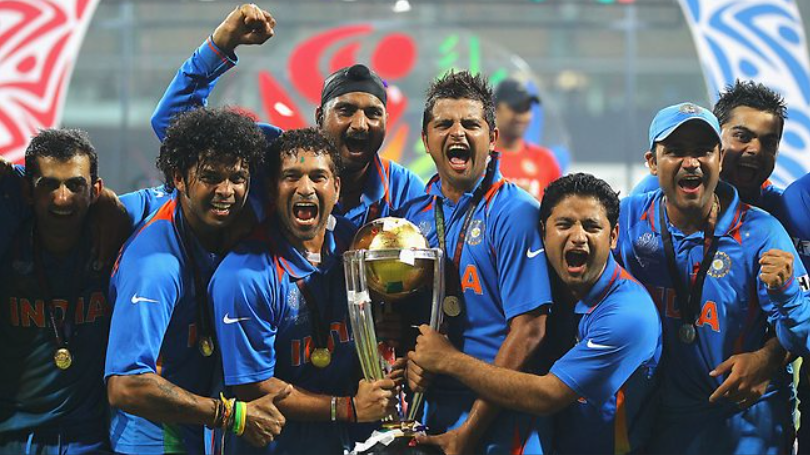

## Saving model

In [ ]:
### Create a Pickle file using serialization
import pickle
pickle_out = open("wcclassifier.pkl","wb")
pickle.dump(best_rf, pickle_out)
#Serialization
pickle_out.close()
